In [3]:
import numpy as np 
import pandas as pd

In [17]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\ashar\Downloads\enchantedwings'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [19]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv(r"C:\Users\ashar\Downloads\enchantedwings\Training_set.csv")

In [25]:
df

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT


In [39]:
train_dir =r'C:\Users\ashar\Downloads\enchantedwings\train'
test_dir = r'C:\Users\ashar\Downloads\enchantedwings\test'

In [41]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   # Split training into train+validation
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
     fill_mode='nearest'
)

In [43]:
# 4. Flow from dataframe for training
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    subset='training',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    subset='validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.


In [45]:
num_classes = len(train_generator.class_indices)

In [47]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
 

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
 

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
  

    Flatten(),
    Dense(128, activation='relu'),
     Dense(512, activation='relu'),
   
    Dense(num_classes, activation='softmax')
])

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 75)                  │          38,475 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,410,059 (13.01 MB)

 Trainable params: 3,409,611 (13.01 MB)

 Non-trainable params: 448 (1.75 KB)

In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
history = model.fit(train_generator, validation_data=val_generator, epochs=30) 

Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.0904 - loss: 4.1173 - val_accuracy: 0.0185 - val_loss: 7.4355
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 145s 888ms/step - accuracy: 0.2113 - loss: 3.0677 - val_accuracy: 0.0639 - val_loss: 5.2077
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 18257s 910ms/step - accuracy: 0.3029 - loss: 2.6206 - val_accuracy: 0.2017 - val_loss: 3.4744
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 146s 893ms/step - accuracy: 0.3825 - loss: 2.2538 - val_accuracy: 0.3187 - val_loss: 2.6398
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 198s 868ms/step - accuracy: 0.4307 - loss: 2.0347 - val_accuracy: 0.3480 - val_loss: 2.5280
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 881ms/step - accuracy: 0.4827 - loss: 1.8451 - val_accuracy: 0.4280 - val_loss: 2.1470
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 879ms/step - accuracy: 0.5295 - loss: 1.6330 - val_accuracy: 0.4388 - val_loss: 2.1221
Epoch 8/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 199s 860ms/step - accuracy: 0.5754 - 

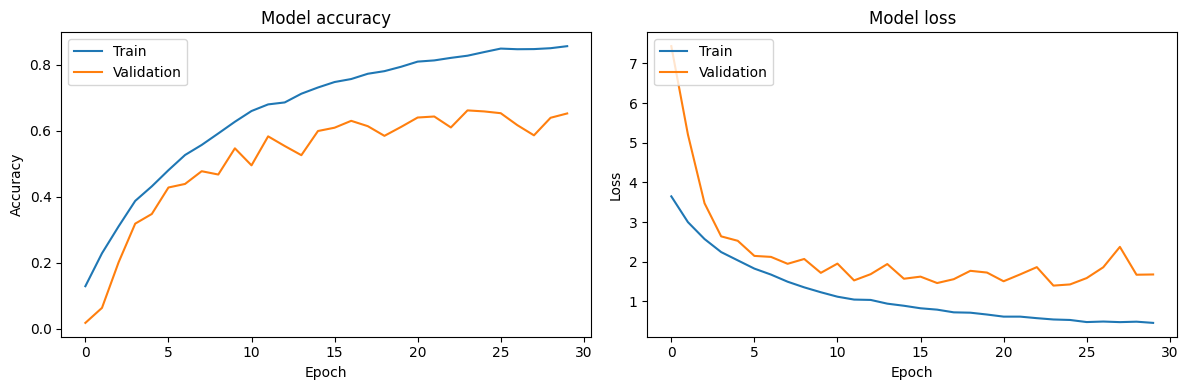

In [59]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


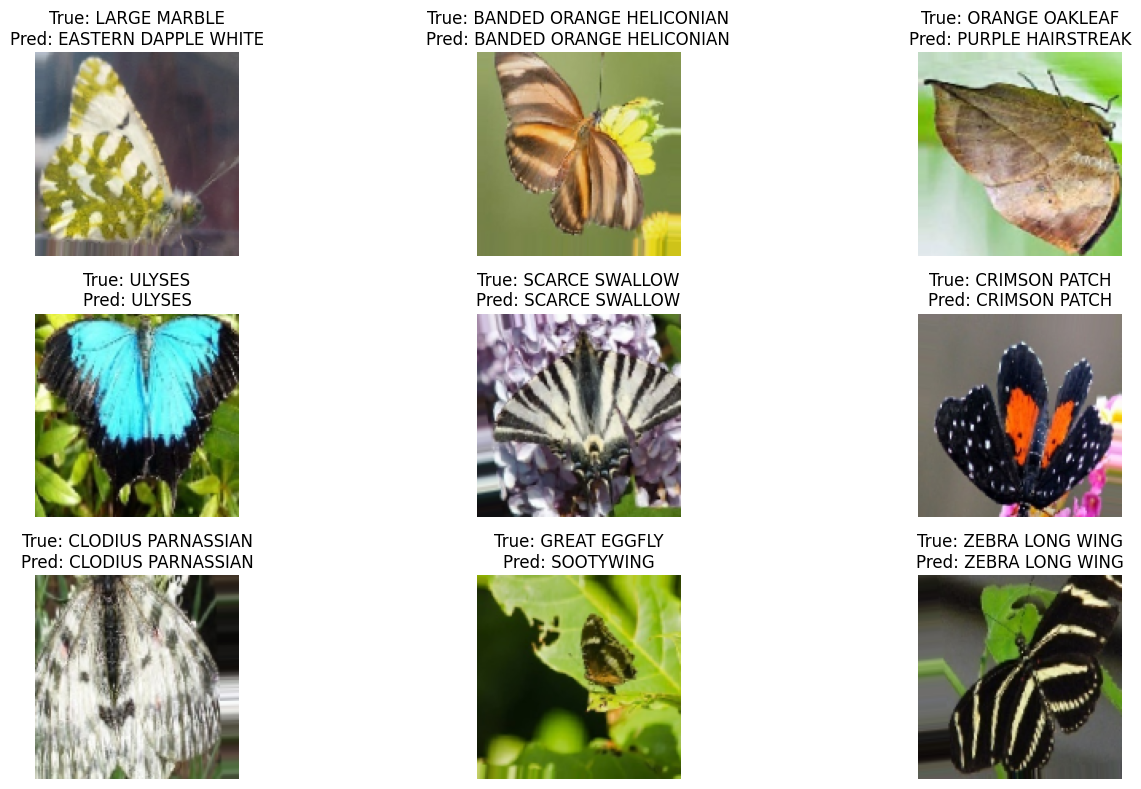

In [65]:
val_images, val_labels = next(val_generator)

pred_labels = model.predict(val_images)
pred_labels = np.argmax(pred_labels, axis=1)
true_labels = np.argmax(val_labels, axis=1)

class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

def display_images(images, true_labels, pred_labels, class_names, num_images=9):
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[int(true_labels[i])]
        pred_label = class_names[int(pred_labels[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_images(val_images, true_labels, pred_labels, class_names, num_images=9)